# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно  определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

*Цель исследования:* выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

*Ход исследования*

Данные  объявлениий  мы получили из файла datasets/real_estate_data.csv. О качестве данных ничего не известно. Поэтому перед анализом данных понадобится обзор данных и предобработка.

Таким образом, исследование пройдёт в три этапа:

    Обзор данных.
    Предобработка данных.
    Проведение исследовательского анализа.


### Откроем файл с данными и изучим общую информацию. 

In [1]:
# импортируем библиотеку pandas
import pandas as pd

# импортируем matplotlib
import matplotlib.pyplot as plt

In [2]:
# прочитаем csv-файл
data = pd.read_csv('/datasets/real_estate_data.csv')

In [3]:
#Выведим первые 20 строчек датафрейма data на экран
data.head(15)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. таблица открывается не корректно, по ней невозможно изучить данные

In [4]:
#Поставим разделитель sep='\t' и посмотрим первые 15 строк таблицы

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Даные открылись корректно. Но часть столбцов не отображаются. Настроим параметр пандас по отображению количества столбцов в датафрейме

In [5]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
#Выведим основную информацию о датафрейме с помощью метода info()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

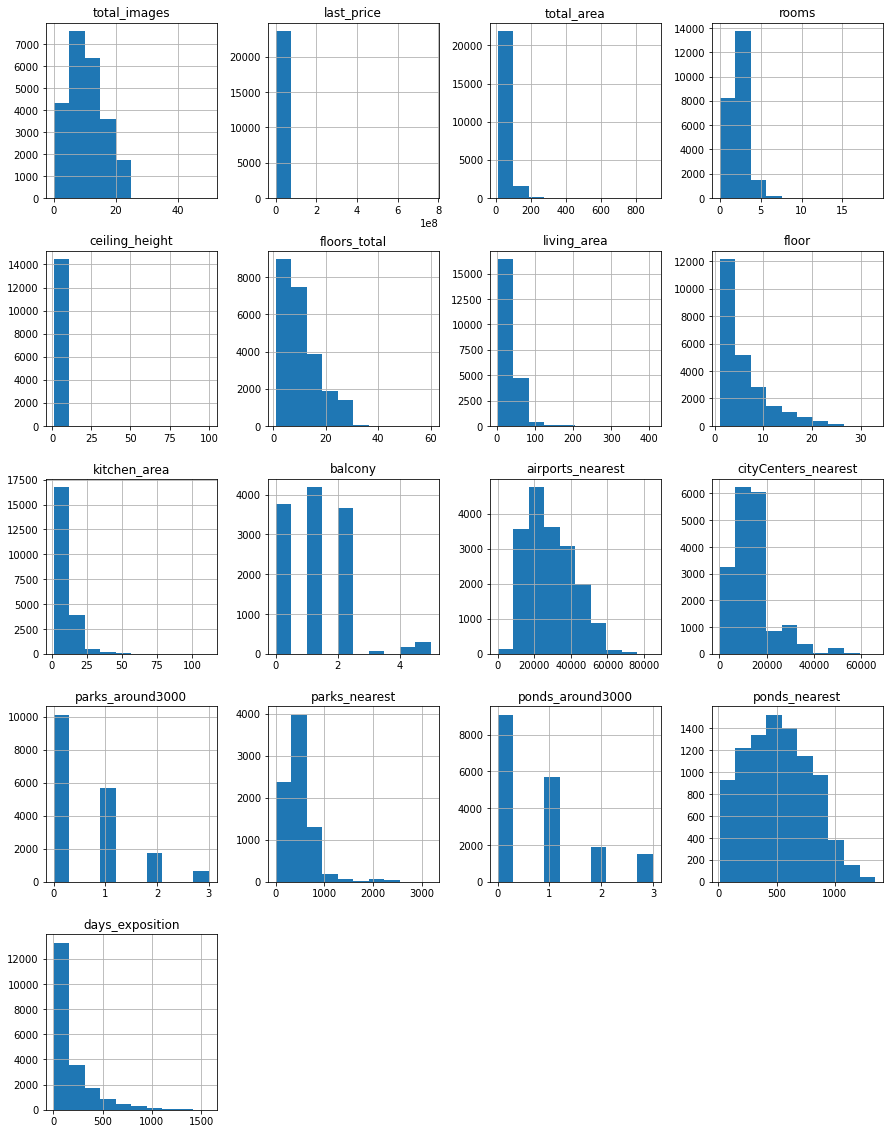

In [7]:
#Построим общую гистограмму для всех столбцов таблицы 
data.hist(figsize=(15, 20));
#plt.show()

### Предобработка данных

In [8]:
#Найдем и изучим пропущенные значения в столбцах. Определим, в каких столбцах есть пропуски.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
#проверим количество пропусков в %
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


У нас пропуски почти во всех столбцах: ceiling_height — высота потолков (м), floors_total — всего этажей в доме, living_area — жилая площадь в квадратных метрах (м²), is_apartment — апартаменты (булев тип), kitchen_area — площадь кухни в квадратных метрах (м²), balcony — число балконов, locality_name — название населённого пункта, airports_nearest — расстояние до ближайшего аэропорта в метрах (м),cityCenters_nearest — расстояние до центра города (м), parks_around3000 — число парков в радиусе 3 км, parks_nearest — расстояние до ближайшего парка (м),ponds_around3000 — число водоёмов в радиусе 3 км, ponds_nearest — расстояние до ближайшего водоёма (м), days_exposition — сколько дней было размещено объявление (от публикации до снятия).

Заполним пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставим эти значения пустыми. 

In [10]:
# заменяем пропущенные значения в is_apartment на False
data['is_apartment'] = data['is_apartment'].fillna(value = 'False')

In [11]:
#заполняем пропуски в floors_total элементами из столбца floor
data['floors_total'] = data['floors_total'].fillna(data['floor'])


In [12]:
# заменяем пропущенные значения на 0. Приводим в целочисленный тип количество балконов.
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [13]:
# заменяем пропущенные значения на 0. Приводим в целочисленный тип количество парков.
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')


In [14]:
# заменяем пропущенные значения на 0. Приводим в целочисленный тип количество прудов.
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

In [15]:
# заменим пропуски в days_exposition и заменим тип данных
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')
data = data.loc[data['days_exposition'] != 0]

In [16]:
#заполним пропуски в  столбце living_area медианным значением по каждому типу из столбца rooms по значениям из сгруппированного датафрейма .
grouped_living_area = data.groupby('living_area')['rooms'].median() 
for row in grouped_living_area.index:
    data.loc[(data['living_area'] == row)&(data['rooms'].isna()), 'rooms'] = grouped_living_area[row]
data['living_area']= data['living_area'].fillna(value=grouped_living_area)

In [17]:
#заполним пропуски в  столбце ceiling_height  медианным значением 
median_ceiling_height =  data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(value=median_ceiling_height)

In [18]:
#заполним пропуски в  столбце locality_name   значением not defined
data['locality_name'] = data['locality_name'].fillna('not defined')

In [19]:
# Смотрим количество пропущенных значений
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1698
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2075
balcony                     0
locality_name               0
airports_nearest         4675
cityCenters_nearest      4653
parks_around3000            0
parks_nearest           13584
ponds_around3000            0
ponds_nearest           12624
days_exposition             0
dtype: int64

Расстояние до парков и водоемов, расстояние до ближайшего аэропорта, площадь кухни оставляем с пропусками тк логическую замену провести невозможно без сторонней информации. Скорее всего, это необязательные поля при заполнении пользователями или некоторые ошибки при выгрузке данных.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20518 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20518 non-null  int64  
 1   last_price            20518 non-null  float64
 2   total_area            20518 non-null  float64
 3   first_day_exposition  20518 non-null  object 
 4   rooms                 20518 non-null  float64
 5   ceiling_height        20518 non-null  float64
 6   floors_total          20518 non-null  float64
 7   living_area           18820 non-null  float64
 8   floor                 20518 non-null  int64  
 9   is_apartment          20518 non-null  object 
 10  studio                20518 non-null  bool   
 11  open_plan             20518 non-null  bool   
 12  kitchen_area          18443 non-null  float64
 13  balcony               20518 non-null  int64  
 14  locality_name         20518 non-null  object 
 15  airports_nearest   

Найдем столбцы, в которых нужно изменить тип данных. 

При заполнении пропусков мы ранее уже заменили на целочисленный тип столбец количество балконов,количество парков, пудов, сколько дней было размещено объявление 

Столбцы, где есть пропуски перевести с float на int мы не сможем

In [21]:
#изменим цену на тип int для удобства просмотра
data['last_price'] = data['last_price'].astype('int')

#изменим rooms на тип int для удобства просмотра
data['rooms'] = data['rooms'].astype('int')

#изменим floors_total на тип int для удобства просмотра
data['floors_total'] = data['floors_total'].astype('int')

#переведем столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [22]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20518 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20518 non-null  int64         
 1   last_price            20518 non-null  int64         
 2   total_area            20518 non-null  float64       
 3   first_day_exposition  20518 non-null  datetime64[ns]
 4   rooms                 20518 non-null  int64         
 5   ceiling_height        20518 non-null  float64       
 6   floors_total          20518 non-null  int64         
 7   living_area           18820 non-null  float64       
 8   floor                 20518 non-null  int64         
 9   is_apartment          20518 non-null  object        
 10  studio                20518 non-null  bool          
 11  open_plan             20518 non-null  bool          
 12  kitchen_area          18443 non-null  float64       
 13  balcony         

In [23]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159.00,2015-07-24,3,2.65,14,2.00,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137
11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252.0,51677.0,0,NaN,0,NaN,7


In [24]:
#проверим количество дубликатов
data.duplicated().sum()

0

Явные дубликаты в нашей таблице отсутствуют.

 *Вывод:*

Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах.

### Изучим данные и добавим в таблицу новые столбцы

In [25]:
#Посмотрим уникальные значения в столбце с названиями,для удобства сортируем в алфавитном порядке.

data['locality_name'].sort_values().unique()

array(['not defined', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Фёдоровское', 'городской посёлок 

Значений с названиями слишком много, попробуем отсортировать список уникальных значений по последнему слову

In [26]:
sorted(data['locality_name'].unique(), key=lambda x: x.split()[-1])

['not defined',
 'деревня Агалатово',
 'посёлок Александровская',
 'посёлок Алексеевка',
 'посёлок Аннино',
 'поселок Аннино',
 'деревня Аро',
 'поселок Барышево',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Старые Бегуницы',
 'деревня Белогорка',
 'посёлок Белоостров',
 'Бокситогорск',
 'поселок городского типа Красный Бор',
 'Сосновый Бор',
 'посёлок городского типа Красный Бор',
 'деревня Бор',
 'деревня Трубников Бор',
 'посёлок Пансионат Зелёный Бор',
 'поселок Пансионат Зелёный Бор',
 'посёлок Бугры',
 'поселок Бугры',
 'городской посёлок Будогощь',
 'деревня Ваганово',
 'посёлок городского типа Важины',
 'деревня Вартемяги',
 'деревня Малое Верево',
 'поселок станции Вещево',
 'посёлок при железнодорожной станции Вещево',
 'городской посёлок Виллози',
 'посёлок городского типа Вознесенье',
 'посёлок Возрождение',
 'поселок Возрождение',
 'поселок Войсковицы',
 'посёлок Войскорово',
 'поселок Володарское',
 'Волосово',
 'Волхов',
 'деревня Большая Вруда',
 'Всеволожск',
 'В

In [27]:
# устраним неявные дубликаты. чтобы сократить число повторов, заменим сначала в названиях букву ё на е. Затем пройдемся по остальным дубликатам 
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('деревня', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].str.replace('село Никольское', 'Никольское')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок Любань', 'Любань')
data['locality_name'] = data['locality_name'].str.replace('село Павлово', 'поселок Павлово')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество Рахья', 'поселок Рахья')

sorted(data['locality_name'].unique(), key=lambda x: x.split()[-1])

['not defined',
 'поселок Агалатово',
 'поселок Александровская',
 'поселок Алексеевка',
 'поселок Аннино',
 'поселок Аро',
 'поселок Барышево',
 'поселок Батово',
 'поселок Бегуницы',
 'поселок Старые Бегуницы',
 'поселок Белогорка',
 'поселок Белоостров',
 'Бокситогорск',
 'поселок Красный Бор',
 'Сосновый Бор',
 'поселок Бор',
 'поселок Трубников Бор',
 'поселок Пансионат Зеленый Бор',
 'поселок Бугры',
 'поселок Будогощь',
 'поселок Ваганово',
 'поселок Важины',
 'поселок Вартемяги',
 'поселок Малое Верево',
 'поселок Вещево',
 'поселок Виллози',
 'поселок Вознесенье',
 'поселок Возрождение',
 'поселок Войсковицы',
 'поселок Войскорово',
 'поселок Володарское',
 'Волосово',
 'Волхов',
 'поселок Большая Вруда',
 'Всеволожск',
 'Выборг',
 'поселок Вырица',
 'поселок Выскатка',
 'поселок Высокоключевой',
 'Высоцк',
 'поселок Гаврилово',
 'поселок Гарболово',
 'Гатчина',
 'поселок Гладкое',
 'поселок Глажево',
 'поселок Глебычево',
 'поселок Глинка',
 'поселок Гончарово',
 'поселок Гор

Найдем и устраним редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м.  Обработаем аномалии в этом и других столбцах.
Если природа аномалии понятна и данные действительно искажены, то восстановим корректное значение.
В противном случае удалим редкие и выбивающиеся значения.


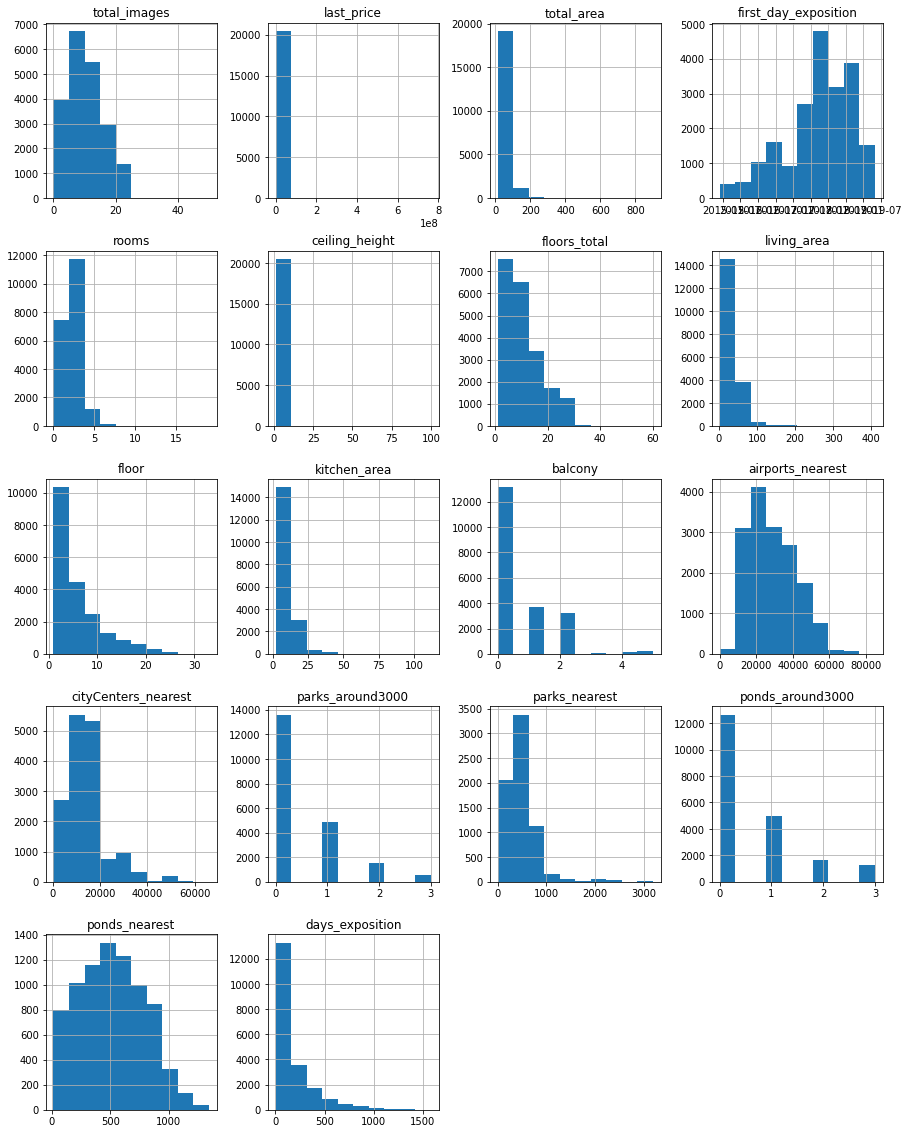

In [28]:
#Построим общую гистограмму для всех столбцов таблицы, чтобы посмотреть редкие и выбивающиеся значения
data.hist(figsize=(15, 20))
plt.show()


Из гистограмм видно,что у нас выбиваются значения в гистограммах по столбацам total_area,rooms,floors_total,living_area, kitchen_area, days_exposition
Теперь пройдемся отдельно по каждому столбцу. 


<AxesSubplot:>

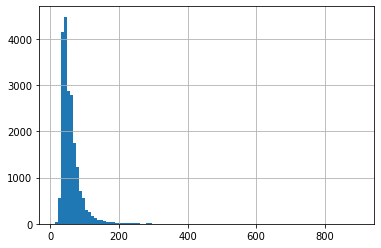

In [29]:
#построим гисторгамму для total_area
data['total_area'].hist(bins = 100)


Гисторгамма стала более информативной. Можно исключить слишком большие значения общей площади и посмoтреть на остальные.


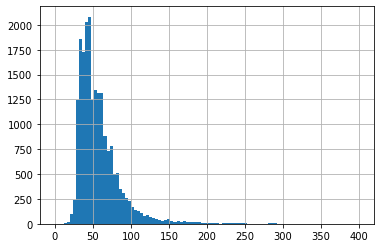

In [30]:
#используя параметр range, изучим распределение общей площади в диапазоне 0 до 400
data['total_area'].hist(bins = 100, range=(0,400))
plt.show()

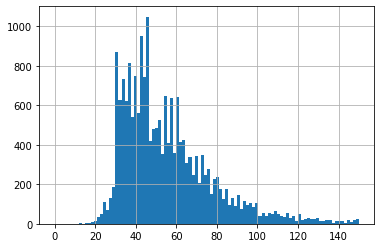

In [31]:
#сократим range, чтобы увидеть пиковые значения
data['total_area'].hist(bins = 100, range=(0,150))
plt.show()

In [32]:
#получим характеристики по выборке методом describe()
data['total_area'].describe()

count    20518.000000
mean        58.870830
std         34.077046
min         12.000000
25%         39.500000
50%         50.900000
75%         67.900000
max        900.000000
Name: total_area, dtype: float64

Общая площадь в нашей выборке колеблется от 12до 900 м2, среднее значение 51 кв.м, а медиана 59 кв.м.


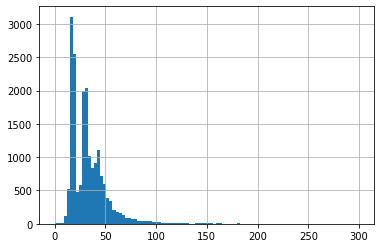

In [33]:
data['living_area'].hist(bins = 100, range=(0,300))
plt.show()

In [34]:
#получим характеристики по выборке методом describe()
data['living_area'].describe()

count    18820.000000
mean        33.526907
std         21.321220
min          2.000000
25%         18.300000
50%         30.000000
75%         41.600000
max        409.700000
Name: living_area, dtype: float64

Жилая площадь в нашей выборке колеблется от 2 до 409,7 м2, среднее значение 30 кв.м, а медиана 34 кв.м.  Аномальные значения более 180 кв.м

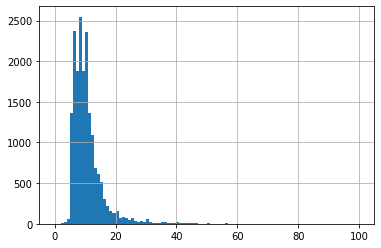

In [35]:
data['kitchen_area'].hist(bins = 100, range=(0,100))
plt.show()

In [36]:
#получим характеристики по выборке методом describe()
data['kitchen_area'].describe()

count    18443.000000
mean        10.436742
std          5.682611
min          2.000000
25%          7.000000
50%          9.100000
75%         11.950000
max        112.000000
Name: kitchen_area, dtype: float64

Площадь кухни в нашей выборке колеблется от 2 до 112 м2, среднее значение 9 кв.м, а медиана 10,4 кв.м.  Аномальные значения более 50 кв.м


Для уточнения аномальных значений в стоблцах 'total_area','living_area','kitchen_area' построим диаграмму размаха. непопадание в  75% перцентиль + 1.5 мкр является достаточным основанием для отнесения наблюдений к выбросам


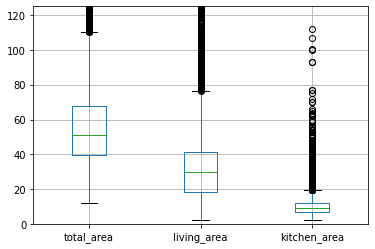

In [37]:
data.boxplot(column=['total_area','living_area','kitchen_area'])
plt.ylim(0,125)
plt.show()

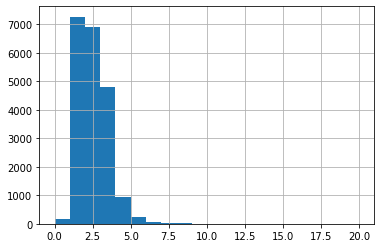

In [38]:
data['rooms'].hist(bins = 20, range=(0,20))
plt.show()

In [39]:
#получим характеристики по выборке методом describe()
data['rooms'].describe()

count    20518.000000
mean         2.024564
std          1.054808
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Количество комнат колеблется от 1 до 19, среднее значение 2, а медиана 2.  Аномальные значения более 6

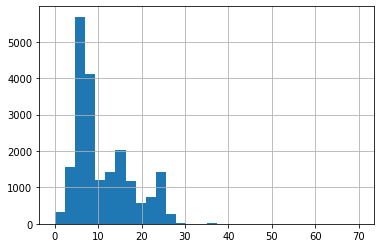

In [40]:

data['floors_total'].hist(bins = 30, range=(0,70))
plt.show()

In [41]:
#получим характеристики по выборке методом describe()
data['floors_total'].describe()

count    20518.000000
mean        10.856760
std          6.650436
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Количество этажей в доме колеблется от 1 до 60, среднее значение 9, а медиана 10,8.  Аномальные значения более 30

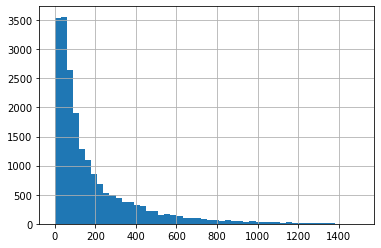

In [42]:
data['days_exposition'].hist(bins = 50, range=(0,1500))
plt.show()

In [43]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Количество дней публикации объявления колеблется от 0 до 1580, среднее значение 95, а медиана 180.  Аномальные значения более 900

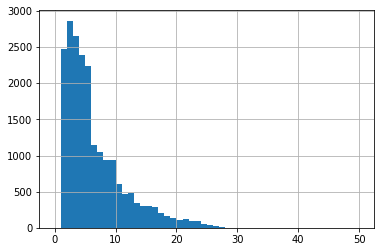

In [44]:
data['floor'].hist(bins = 50, range=(0,50))
plt.show()

In [45]:
data['floor'].describe()

count    20518.000000
mean         5.987133
std          4.943915
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Значение в столбце "Этаж квартиры" колеблется от 1 до 33, среднее значение 4, а медиана 6.  Аномальные значения более 25

In [46]:
#убираем аномальные значения в столбцах total_area,rooms,floors_total,living_area, kitchen_area, days_exposition
data = data.query('total_area<=300 and living_area<=180 and kitchen_area<=50 and rooms<=6 and floors_total<=30 and days_exposition<=1000 and floor<=25')

In [47]:
#убираем аномальные значения в столбце высоты потолка, получим характеристики по выборке методом describe()
data['ceiling_height'].describe()

count    17692.000000
mean         2.708417
std          0.959365
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Видно, что максимальное значение аномальное(высота потолка 100 м). также есть значения с высотой менее 2 м,что также кажется неккоректным. заполним аномальные значения (менее 2 м и более 5 м) и значения Nan медианой. выведим отсортированный список

In [48]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.loc[(data['ceiling_height']<2) | (data['ceiling_height']>5), 'ceiling_height'] =data['ceiling_height'].median()
data['ceiling_height'].sort_values(ascending=False)


21923    4.9
2802     4.8
1300     4.7
10159    4.5
6802     4.5
        ... 
19098    2.0
16884    2.0
20520    2.0
11352    2.0
552      2.0
Name: ceiling_height, Length: 17692, dtype: float64

In [49]:
data['ceiling_height'].describe()

count    17692.000000
mean         2.686836
std          0.200959
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

Добавим в таблицу новые столбцы со следующими параметрами:
цена одного квадратного метра;
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры (значения — «‎первый», «последний», «другой»);
расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [50]:
#цена одного квадратного метра, приведем к типу int,округлим значения до целого
data['price_square_meter'] = data['last_price']/data['total_area'].astype('int')
data = data.round({'price_square_meter': 0})

#день недели публикации
data['weekday'] = data['first_day_exposition'].dt.weekday

#месяц публикации объявления 
data['month'] = data['first_day_exposition'].dt.month

# год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

# тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_type(floor):
    if floor['floor'] == 1:
        return 'Первый'
    elif floor['floor'] == floor['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
    
data['floor_type'] = data.apply(floor_type, axis=1)

#расстояние до центра города в километрах (перевем из м в км и округлим до целых значений)
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data = data.round({'cityCenters_nearest_km': 0})

#выводим первые 5 строк, чтобы убедиться,что новые столбцы добавлены

data.head()


     

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_type,cityCenters_nearest_km
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,83750.0,1,12,2018,Первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92786.0,3,8,2015,Другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,Другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55,96333.0,0,9,2018,Другой,NaN
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,False,False,False,14.4,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,100000.0,3,11,2017,Другой,19.0


### Проведем исследовательский анализ данных

# Изучение основных параметров: 
Общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления.

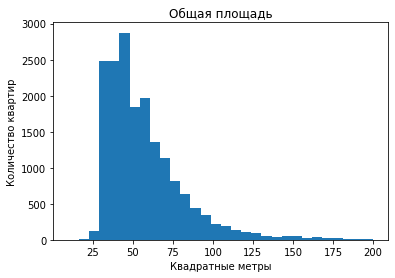

In [51]:
#общая площадь
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир - менее 75 кв.м, больше 150 кв.м площадь практически не встречается. 

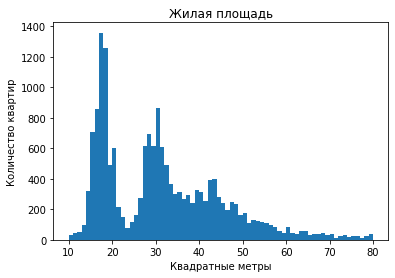

In [52]:
#жилая площадь
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Самые распространённые варианты с жилой площадью от 15 до 50 метров. После 80 метров встречаются единичные случаи. Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.

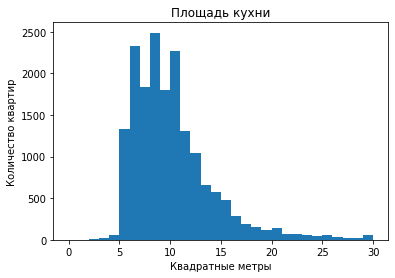

In [53]:
#площадь кухни
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Самые распространённые кухни - от 5 до 15 метров. Больше 20 метров кухни практически не встречаются. 

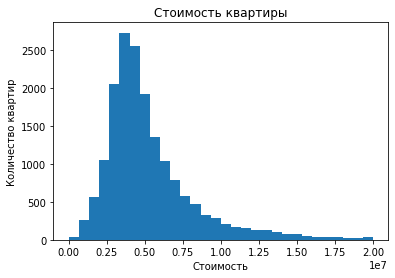

Наибольшие по цене варианты:
1436     330000000
8900     190870000
19155    160000000
2536     159984000
16495    159000000
Name: last_price, dtype: int64


In [54]:
#Цена объекта
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартиры')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head())

В основном стоимость квартир - порядка 2,5-7,5 миллионов. Больше 20 миллионов вариантов мало, а некоторые - на порядок дороже(159-330 млн).

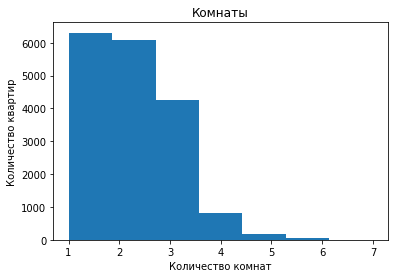

In [55]:
#Количество комнат
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир.

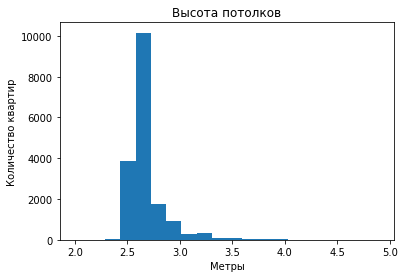

In [56]:
#Высота потолков
plt.hist(data['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. 

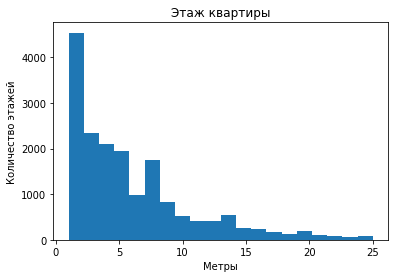

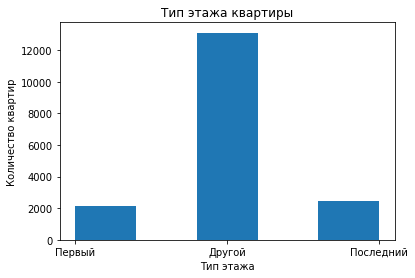

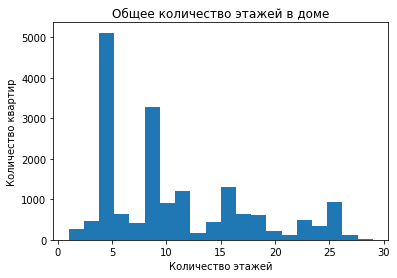

In [57]:
#Этаж квартиры, тип этажа квартиры
plt.hist(data['floor'], bins=20)
plt.title('Этаж квартиры')
plt.xlabel('Метры')
plt.ylabel('Количество этажей')
plt.show()

#тип этажа квартиры
plt.hist(data['floor_type'], bins=5)
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

#общее количество этажей в доме
plt.hist(data['floors_total'], bins=20)
plt.title('Общее количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

В основном преобладают квартиры ниже 5 этажа, скорее всего, скорее всего это связано с тем,что квартиры продаются в малоэтажных домах(4-5 этажные). Реже стречаются квартиры до 10 этажа.  Первый и последний этаж встречаются реже, чем другие.
Гистограммой "Общее количество этажей" подтверждает наши выводы о том, что в наших данных преобладают 5-ти этажные дома

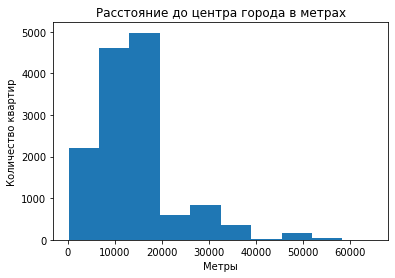

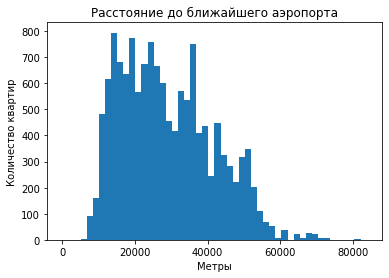

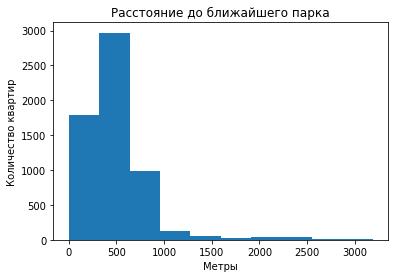

In [58]:
#Расстояние до центра города в метрах
plt.hist(data['cityCenters_nearest'], bins=(10))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

#Расстояние до ближайшего аэропорта
plt.hist(data['airports_nearest'], bins=(50))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

#Расстояние до ближайшего парка
plt.hist(data['parks_nearest'], bins=(10))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Практически возле каждой квартиры есть парк на расстоянии до 1 км. 
Большая часть квартир удалены от центра до 10-20 км. Но и есть шанс найти квартиру в центе, таких объявлений около 2,7 тысяч.
Аэропорт расположен в целом на расстоянии 15-40 км


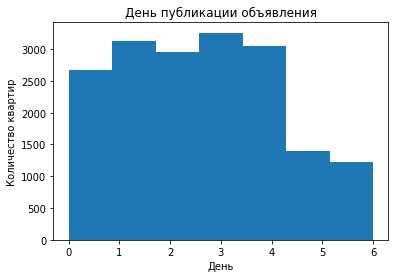

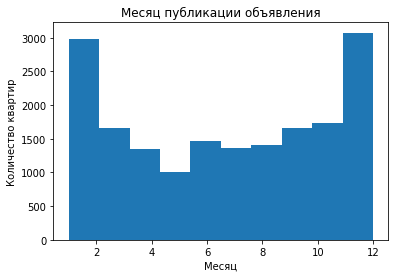

In [59]:
#День публикации объявления
plt.hist(data['weekday'], bins=(7))
plt.title('День публикации объявления')
plt.xlabel('День')
plt.ylabel('Количество квартир')
plt.show()

# Месяц публикации объявления
plt.hist(data['month'], bins=(10))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

Квартиры выставляют на продажу круглогодично, но в январе и декабре продают в два раза чаще. В пятницу и в субботу объявления выклыдывают реже,чем в остальные дни недели

# Изучим, как быстро продавались квартиры. 

Столбец days_exposition показывает, сколько дней было размещено каждое объявление.
Построим гистограмму.Посчитаем среднее и медиану.

Время продажи (медиана): 99.0
Время продажи (среднее): 171.55087044992086


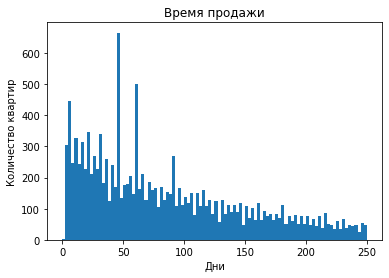

count    17692.000000
mean       171.550870
std        189.506414
min          1.000000
25%         44.000000
50%         99.000000
75%        229.000000
max       1000.000000
Name: days_exposition, dtype: float64

In [60]:
# Посчитаем среднее и медиану
print('Время продажи (медиана):', data['days_exposition'].median())
print('Время продажи (среднее):', data['days_exposition'].mean())

# Гистограма времени продажи
plt.hist(data.query('days_exposition != 9999')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

# Изучаем значения срока продажи
data['days_exposition'].describe()

Медианное время продажи - 76 дней. 
Среднее время продажи - 148 дней.
В основном квартиры продаются за срок в 50-100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. 

Быстрой продажей можно назвать срок в 50дней и меньше. Долгой продажей - 150 дней (5 месяцев) и дольше.


Аномальные значения наблюдаем на 45 и 60 дне. Это очень похоже на техническую составляющую самой платформы (вероятнее всего, в эти дни платформа сама удаляет объявления, если пользователь его не продлил).


# Факторы,которые больше всего влияют на общую (полную) стоимость объекта.
Изучим, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).


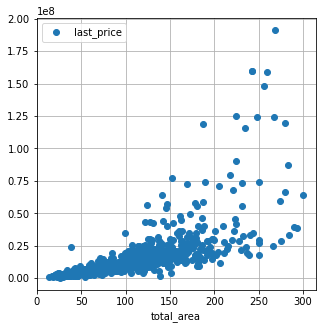

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.661697
total_area    0.661697    1.000000 



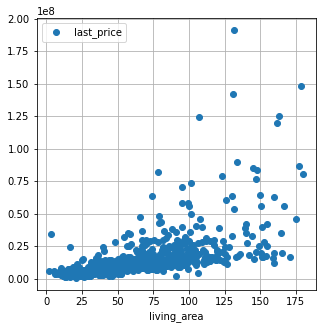

Корреляция цены от размера жилой площади: 

             last_price  living_area
last_price     1.000000     0.080738
living_area    0.080738     1.000000 



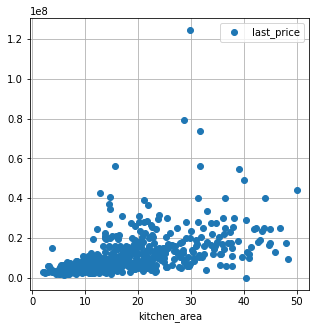

Корреляция цены от размера кухни: 

              kitchen_area  last_price
kitchen_area       1.00000     0.54621
last_price         0.54621     1.00000 



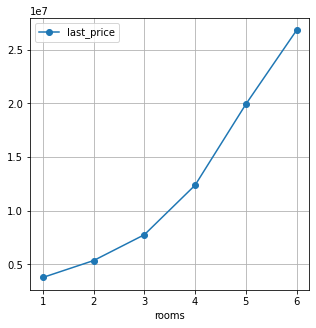

Корреляция цены и числа комнат: 

            last_price    rooms
last_price     1.00000 -0.18271
rooms         -0.18271  1.00000 



In [61]:
# Зависимость цены от площади
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

# Зависимость цены от размера жилой площади
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены от размера жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

# Зависимость цены от размера кухни
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены от размера кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

# Зависимость цены от числа комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')





Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.




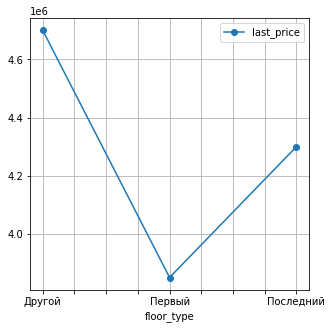

In [62]:
# Зависимость цены от этажа
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()



Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.


 Традиционно, квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.


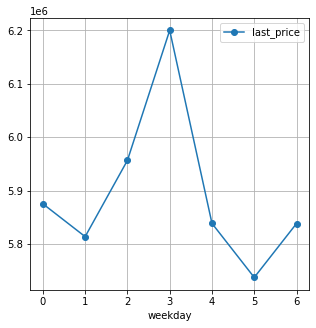

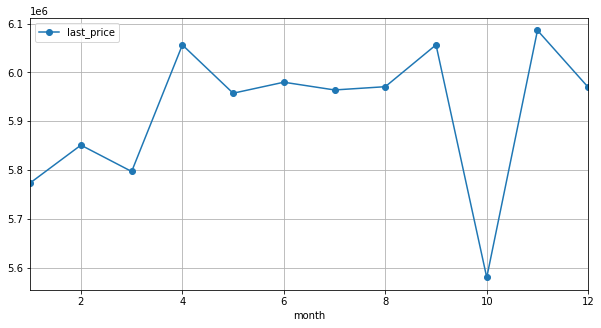

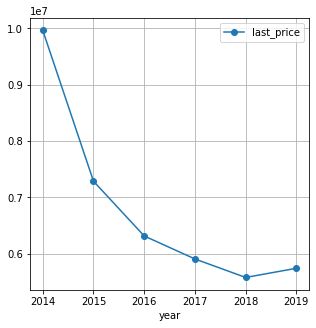

In [63]:
# Зависимость от дня размещения
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

# Зависимость от месяца размещения
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()

# Зависимость от года размещения
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()



День недели: дороже всего квартиры, опубликованные в среду, дешевле всего - в пятницу. Месяц: дороже всего квартиры, продающиеся в апреле, сентябре и ноябре, дешевле всего -в октябре. Год: квартиры очень сильно подешевели в 2016-2018 годах. В 2019 году цены снова стали повышаться.




Рассмотрим динамику цены 1м2 и площади продаваемых квартир. И потом пересмотрим выводы, т.к., возможно, упала не столько цена, сколько площадь продаваемых квартир?


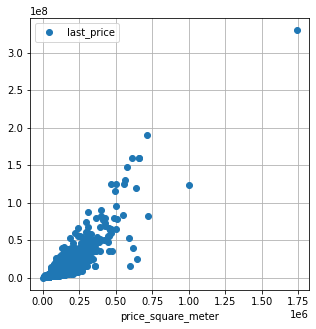

Корреляция цены 1м2 и площади: 

                    last_price  price_square_meter
last_price            1.000000            0.719319
price_square_meter    0.719319            1.000000 



In [64]:
# Зависимость  цены 1м2  от площади
(
    data.pivot_table(index='price_square_meter', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены 1м2 и площади:','\n')
print(data.pivot_table(index='floor', values=['price_square_meter', 'last_price']).corr(),'\n')


Корреляция между ценой за 1 квадратный метр и площади квартиры крайне высокая (0,7).


#  Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
Выделим населённые пункты с самой высокой и низской стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [65]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
city_top_ten = data['locality_name'].value_counts().head(10)
city_price = data.query('locality_name in (@city_top_ten.index)').pivot_table(values='price_square_meter', index='locality_name')
city_price = city_price.astype(int)
city_price.sort_values('price_square_meter', ascending=False)

,price_square_meter
locality_name,
Санкт-Петербург,111182
Пушкин,102721
Кудрово,94841
поселок Парголово,90432
Мурино,86161
Петергоф,83255
поселок Шушары,78233
Колпино,74747
Всеволожск,69364


Наибольшая средняя стоимость квадратного метра  в Санкт-Петербурге. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, которые далеко расположены от Санкт-Петербурга

# Средняя стоимость каждого киломента в Санкт-Петербурге


In [66]:
#Выделим квартиры в Санкт-Петербурге и вычислим среднююцену каждого километра. 
spb_data = data.query('locality_name == "Санкт-Петербург"')
spb_price = spb_data.pivot_table(index='cityCenters_nearest_km',values='price_square_meter')
spb_price.head(10)

,price_square_meter
cityCenters_nearest_km,
0.0,191538.357143
1.0,161624.955224
2.0,155803.502326
3.0,116040.453390
4.0,126974.219262
5.0,134209.185243
6.0,142671.687651
7.0,147467.655738
8.0,122818.749436


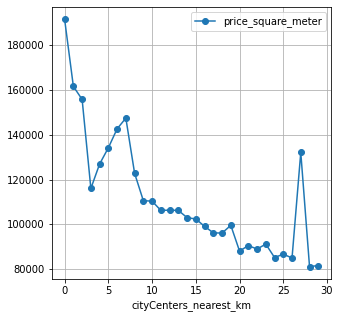

In [67]:
(
   spb_price.pivot_table(index='cityCenters_nearest_km', values='price_square_meter')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()



В целом, чем ближе к центру, тем дороже квартиры. При этом в радиусе 5-7 км эта корреляция не очевидна. 

### Общий вывод

# Предобработка данных
Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. 

# Исследовательский анализ данных
*Особенности и зависимости, которые существуют на рынке недвижимости:*

Стоимость квартир в Санкт-Петербурге и ближайших городах составляет 2,5-7,5 миллионов. Но есть и квартиры, стоимость которых на порядок дороже(159-330 млн). Средняя жилая площадь квартир порядка 75 кв.м.
Чаще всего квартиры продаются за 76 дней. Быстрой продажей можно назвать срок в 50 дней и меньше. Долгой продажей - 150 дней (5 месяцев) и дольше.

Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь.
Чем больше площадь квартиры, тем выше стоимость. Корреляция этих параметров  высокая. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.
Самые дорогие варианты квартир находятся в центре города.
Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Дороже всего квадратный метр в Санкт-Петербурге Дешевле всего квадратный метр в Гатчине и Всеволожске, которые достаточно удалены  от Санкт-Петербурга.

